In [2]:
import numpy as np
import qutip as qt

import pulsee.plot as psplt

import operators as op

# from global_constants import CLEAN_1000, RHO_1000

pi = np.pi
identity = qt.tensor(op.id, op.id)

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


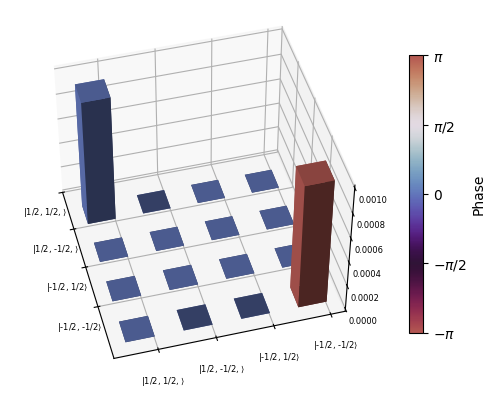

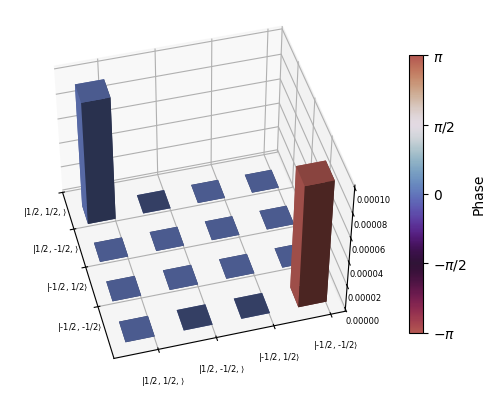

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [3]:
Thermal = (.001) * (op.Iz + op.Sz)
psplt.plot_complex_density_matrix(Thermal)

Thermal = (.0001) * (op.Iz + op.Sz)
psplt.plot_complex_density_matrix(Thermal)


# H Gate

In [4]:
op.Rx(pi)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]

$$
R_y(\pi/2) = \frac{1}{\sqrt{2}} 
    \begin{pmatrix}
        1 & -1\\
        1 & 1
    \end{pmatrix}
$$

In [5]:
op.Ry(pi / 2) * np.sqrt(2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1. -1.]
 [ 1.  1.]]

In [6]:
op.Rx(pi) * op.Ry(pi / 2) / (-1j / np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

In [7]:
H = op.Rx(pi) * op.Ry(pi / 2)
H

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.-0.70710678j 0.-0.70710678j]
 [0.-0.70710678j 0.+0.70710678j]]

In [8]:
#op.H_1  / (-1j/np.sqrt(2))

# T gate:

In [9]:
op.Rx(pi / 2) / (1 / np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.-1.j]
 [0.-1.j 1.+0.j]]

In [10]:
np.sqrt(2)

1.4142135623730951

In [11]:
op.Ry(pi / 4)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]

In [12]:
op.Ry(pi)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0. -1.]
 [ 1.  0.]]

In [13]:
# op.Ry(pi/4) / np.cos(pi/8)
op.Ry(pi / 4) ** 4

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -2.77555756e-16]]

In [14]:
op.Rx(-pi / 2) / (1 / np.sqrt(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.+1.j]
 [0.+1.j 1.+0.j]]

In [15]:
T = op.Rx(pi / 2) * op.Ry(pi / 4) * op.Rx(-pi / 2)
T

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 9.23879533e-01-3.82683432e-01j -8.32667268e-17+1.11022302e-16j]
 [ 1.11022302e-16-5.55111512e-17j  9.23879533e-01+3.82683432e-01j]]

In [16]:
# T_new = T / T.full()[0,0]
T_new = T * np.exp(1j * pi / 8)
T_new

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00-5.55111512e-17j -1.19414820e-16+7.07064361e-17j]
 [ 1.23814431e-16-8.79922067e-18j  7.07106781e-01+7.07106781e-01j]]

In [17]:
np.exp(1j * pi / 4)

(0.7071067811865476+0.7071067811865476j)

# Temporal Averaging:
Donny has used these pulse sequences: (read from left to right)
- U0 = no pulses
- U1 = Sy - 1/2J - Iy - Sx - 1/2J - Ix 
- U2 = Iy - 1/2J - Ix - Sy - 1/2J - Sx

In [18]:
rho_therm = qt.Qobj(
    np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]]),
    dims=[[2, 2], [2, 2]]).unit()

rho_therm

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.4]]

In [19]:
ta_0 = identity
display(ta_0)
rho_0 = ta_0 * rho_therm * ta_0.dag()
rho_0

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.1 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.4]]

In [20]:
ta_1 = op.Rx_I(pi / 2) * op.UJ * op.Rx_S(pi / 2) * op.Ry_I(pi / 2) * op.UJ * op.Ry_S(pi / 2)
display(ta_1)

rho_1 = ta_1 * rho_therm * ta_1.dag()
rho_1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00-1.00000000e+00j  0.00000000e+00-7.78822944e-17j
  -1.62588398e-17+0.00000000e+00j -6.11230341e-18+0.00000000e+00j]
 [ 0.00000000e+00+3.25176795e-17j  0.00000000e+00+2.45660405e-16j
  -1.00000000e+00+0.00000000e+00j -2.11898069e-16+0.00000000e+00j]
 [ 1.08744073e-17+0.00000000e+00j -1.14967359e-17+0.00000000e+00j
   0.00000000e+00+1.34638103e-16j  0.00000000e+00-1.00000000e+00j]
 [-2.36158002e-17+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00-2.39653644e-16j  0.00000000e+00+4.76210391e-18j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e-01  1.62588398e-18  0.00000000e+00  0.00000000e+00]
 [ 1.62588398e-18  3.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.00000000e-01 -4.20418874e-18]
 [ 0.00000000e+00  0.00000000e+00 -4.20418874e-18  2.00000000e-01]]

In [21]:
ta_2 = op.Rx_S(pi / 2) * op.UJ * op.Ry_S(pi / 2) * op.Rx_I(pi / 2) * op.UJ * op.Ry_I(pi / 2)
display(ta_2)

rho_2 = ta_2 * rho_therm * ta_2.dag()
rho_2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.00000000e+00-1.00000000e+00j -5.85822100e-33+0.00000000e+00j
   0.00000000e+00+6.22328532e-19j  3.25176795e-17+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+2.45660405e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.00000000e+00j]
 [ 0.00000000e+00-2.36635962e-32j -1.00000000e+00+0.00000000e+00j
   0.00000000e+00+2.68031548e-16j -2.11898069e-16+0.00000000e+00j]
 [-2.36158002e-17+0.00000000e+00j  0.00000000e+00-2.35513869e-16j
   1.00000000e+00+0.00000000e+00j  0.00000000e+00-6.77927340e-32j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.00000000e-01 0.00000000e+00 8.31871524e-34 0.00000000e+00]
 [0.00000000e+00 4.00000000e-01 0.00000000e+00 1.55458071e-32]
 [8.31871524e-34 0.00000000e+00 2.00000000e-01 0.00000000e+00]
 [0.00000000e+00 1.55458071e-32 0.00000000e+00 3.00000000e-01]]

In [22]:
1 / 3 * (rho_0 + rho_1 + rho_2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e-01  5.41961325e-19  2.77290508e-34  0.00000000e+00]
 [ 5.41961325e-19  3.00000000e-01  0.00000000e+00  5.18193571e-33]
 [ 2.77290508e-34  0.00000000e+00  3.00000000e-01 -1.40139625e-18]
 [ 0.00000000e+00  5.18193571e-33 -1.40139625e-18  3.00000000e-01]]

In [23]:
(1 / 4 * (1 - 0.1) * identity + 0.1 * op.CLEAN_1000) * 1 / 3

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.10833333 0.         0.         0.        ]
 [0.         0.075      0.         0.        ]
 [0.         0.         0.075      0.        ]
 [0.         0.         0.         0.075     ]]

# CNOT gate we have used in our experiments so far.

Technically, it's a pseudo-cnot, where the non-zero shape of the matrix is correct, but the phase of each element is wrong:


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00-7.85046229e-17j  1.00875766e-16-6.16297582e-33j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-1.23259516e-32-6.22328532e-19j  7.85046229e-17+1.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.23259516e-32+1.67155782e-16j -7.85046229e-17-1.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.00000000e+00-7.85046229e-17j  2.11898069e-16-6.16297582e-33j]]

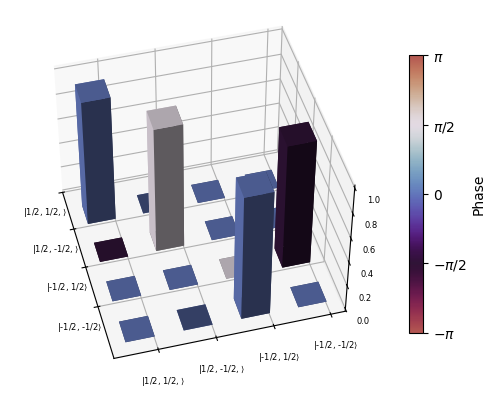

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [24]:
cnot_pseudo = np.sqrt(1j) * op.Rx_S(pi / 2) * op.UJ * op.Ry_S(pi / 2)
display(cnot_pseudo)
psplt.plot_complex_density_matrix(cnot_pseudo)

Correctly phased CNOT gate:

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00  1.00875766e-16  0.00000000e+00  0.00000000e+00]
 [-6.22328532e-19  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.67155782e-16  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.11898069e-16]]

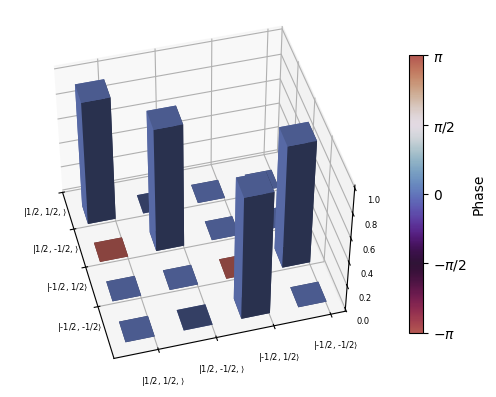

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [25]:
cnot_correct = op.Rz_I(pi / 2) * op.Rz_S(-pi / 2) * cnot_pseudo
display(cnot_correct)
psplt.plot_complex_density_matrix(cnot_correct)

## CNOT_pseudo vs CNOT_correct

So far, we didn't measure any difference between the CNOT_pseudo and CNOT_correct, so I incorrectly assumed that the individual element phases cancelled out.

However, this isn't the case. We only didn't notice that CNOT_pseudo isn't the complete CNOT because our input and output states only have diagonal elements (spins are along the z-axis).

If we have inputs & outputs with non-diagonal elements (spins away z-axis), we should notice the difference:

First, our usual diagonal input:

In [26]:
display(cnot_pseudo * op.CLEAN_1000 * cnot_pseudo.dag())
display(cnot_correct * op.CLEAN_1000 * cnot_correct.dag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99999992e-01 -1.22770959e-32  0.00000000e+00  0.00000000e+00]
 [-1.22770959e-32  3.87292799e-37  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99999992e-01  1.00875765e-16  0.00000000e+00  0.00000000e+00]
 [-6.22328527e-19 -6.27778670e-35  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Now, non-diagonal input:

In [27]:
full_state = qt.Qobj(np.array([[1, 1, 1, 1],
                               [1, 1, 1, 1],
                               [1, 1, 1, 1],
                               [1, 1, 1, 1]], dtype=complex), dims=[[2, 2], [2, 2]])

In [28]:
# non_diag_state = op.Ry_I(pi/2) * CLEAN_1000 * op.Ry_I(pi/2)
# non_diag_state = op.Ry_S(pi/7) * CLEAN_1000 * op.Ry_S(pi/7)
non_diag_state = full_state
non_diag_state

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

In [29]:
display(cnot_pseudo * non_diag_state * cnot_pseudo.dag())
display(cnot_correct * non_diag_state * cnot_correct.dag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00-1.23259516e-32j -1.23259516e-32-1.00000000e+00j
   0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j
  -1.00000000e+00-1.23259516e-32j -1.23259516e-32+1.00000000e+00j]
 [-1.23259516e-32-1.00000000e+00j -1.00000000e+00+1.23259516e-32j
   1.00000000e+00+0.00000000e+00j  0.00000000e+00-1.00000000e+00j]
 [ 1.00000000e+00-1.23259516e-32j -1.23259516e-32-1.00000000e+00j
   0.00000000e+00+1.00000000e+00j  1.00000000e+00+0.00000000e+00j]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

In [30]:
op.Rz_I(pi) * op.Ry_I(-pi / 2) * np.sqrt(2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.-1.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+1.j]]

In [31]:
op.Rz(pi) * op.Ry(-pi / 2) * np.sqrt(2) * 1j

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

In [32]:
op.Rx(pi) * op.Ry(pi / 2) * np.sqrt(2) * 1j

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  1.]
 [ 1. -1.]]

In [33]:
2 * op.IySz + op.Iy

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [34]:
op.IzSz + op.Sz

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.75  0.    0.    0.  ]
 [ 0.   -0.75  0.    0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 0.    0.    0.   -0.25]]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00  1.00875766e-16  0.00000000e+00  0.00000000e+00]
 [-6.22328532e-19  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.67155782e-16  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.11898069e-16]]

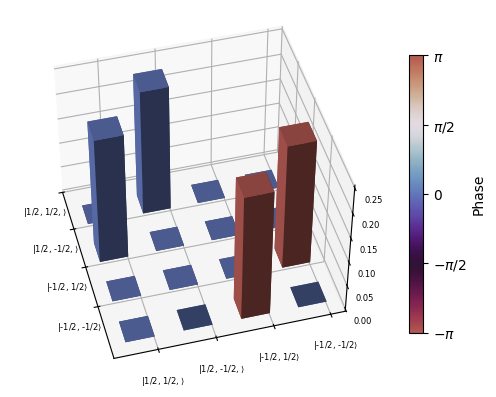

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [35]:
cnot_correct = op.Rz_I(pi / 2) * op.Rz_S(-pi / 2) * cnot_pseudo
display(cnot_correct)
psplt.plot_complex_density_matrix(op.IzSx)

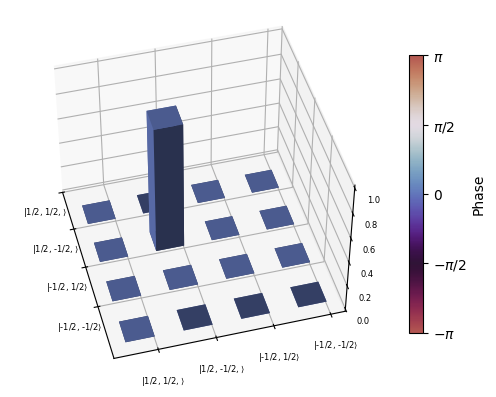

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [36]:
state = op.Ry_S(pi) * op.CLEAN_1000 * op.Ry_S(pi).dag()
#state = op.CLEAN_1000
psplt.plot_complex_density_matrix(state)

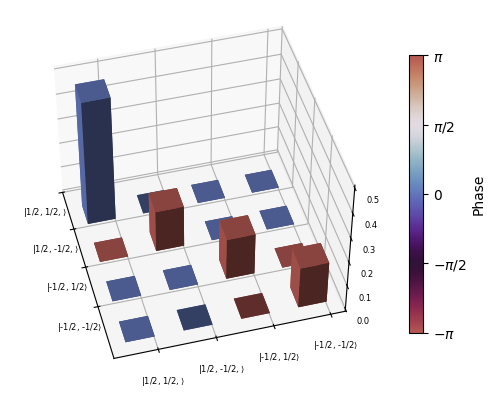

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [37]:
state = cnot_correct * op.RHO_1000 * cnot_correct.dag()
#state = op.CLEAN_1000
psplt.plot_complex_density_matrix(state)

In [42]:
print(op.Rx(pi))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]


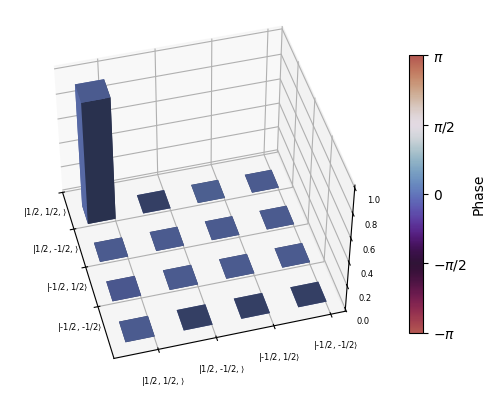

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [54]:
psplt.plot_complex_density_matrix(op.T * op.CLEAN_1000 * op.T.dag())

In [53]:
op.Rx_I(pi / 2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        -0.70710678j]
 [0.        -0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

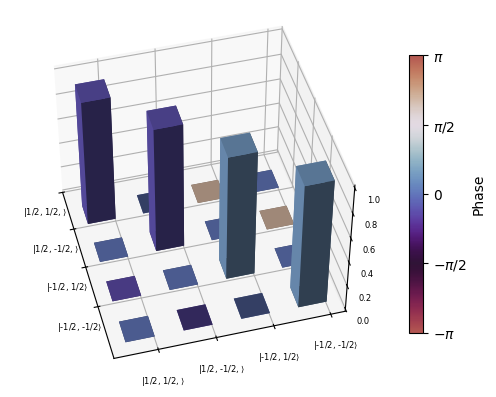

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [56]:
psplt.plot_complex_density_matrix(op.T)

In [58]:
op.T

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 9.23879533e-01-3.82683432e-01j  0.00000000e+00+0.00000000e+00j
  -8.32667268e-17+1.11022302e-16j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.23879533e-01-3.82683432e-01j
   0.00000000e+00+0.00000000e+00j -8.32667268e-17+1.11022302e-16j]
 [ 1.11022302e-16-5.55111512e-17j  0.00000000e+00+0.00000000e+00j
   9.23879533e-01+3.82683432e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.11022302e-16-5.55111512e-17j
   0.00000000e+00+0.00000000e+00j  9.23879533e-01+3.82683432e-01j]]

In [63]:
np.e ** (1j * (-0.3927))

(0.923879181092213-0.38268428076468186j)

In [66]:
np.e ** (1j * (np.pi / 8))

(0.9238795325112867+0.3826834323650898j)

In [67]:
op.CLEAN_1000 * op.CLEAN_0100

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

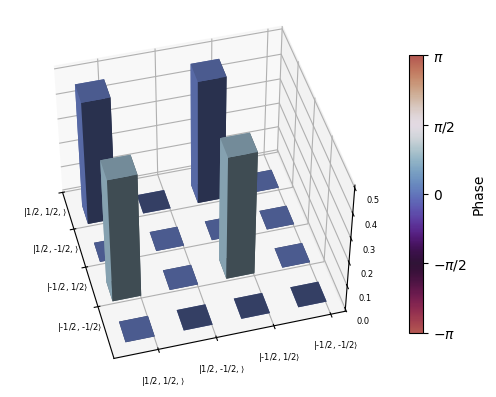

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [71]:
psplt.plot_complex_density_matrix(op.T * op.H_1 * op.CLEAN_1000 * op.T.dag() * op.H_1.dag())

In [71]:
psplt.plot_complex_density_matrix(op.T * op.H_1 * op.CLEAN_1000 * op.T.dag() * op.H_1.dag())

In [73]:
M_1000 = op.T * op.H_1 * op.CLEAN_1000 * op.T.dag() * op.H_1.dag()
M_0100 = op.T * op.H_1 * op.CLEAN_0100 * op.T.dag() * op.H_1.dag()
M_0010 = op.T * op.H_1 * op.CLEAN_0010 * op.T.dag() * op.H_1.dag()
M_0001 = op.T * op.H_1 * op.CLEAN_0001 * op.T.dag() * op.H_1.dag()

In [81]:
print((M_1000.dag() * M_1000).tr())
print((M_1000.dag() * M_0100).tr())
print((M_1000.dag() * M_0010).tr())
print((M_1000.dag() * M_0001).tr())


0.9999999847721552
0.0
-1.1091831943658215e-17
0.0


In [82]:
print((M_0100.dag() * M_1000).tr())
print((M_0100.dag() * M_0100).tr())
print((M_0100.dag() * M_0010).tr())
print((M_0100.dag() * M_0001).tr())

0.0
0.9999999999999984
0.0
-2.962411974888902e-18


In [83]:
print((M_0010.dag() * M_1000).tr())
print((M_0010.dag() * M_0100).tr())
print((M_0010.dag() * M_0010).tr())
print((M_0010.dag() * M_0001).tr())

-1.1091831943658215e-17
0.0
0.9999999910328157
0.0


In [84]:
print((M_0001.dag() * M_1000).tr())
print((M_0001.dag() * M_0100).tr())
print((M_0001.dag() * M_0010).tr())
print((M_0001.dag() * M_0001).tr())

0.0
-2.962411974888902e-18
0.0
0.99999997970812


In [86]:
print((M_0001.dag() * op.CLEAN_1000).tr())

0.0


In [102]:
rotated = op.Ry_S(pi) * op.CLEAN_1000 * op.Ry_S(pi).dag()

In [103]:
print((rotated.dag() * op.CLEAN_1000).tr())

0.0


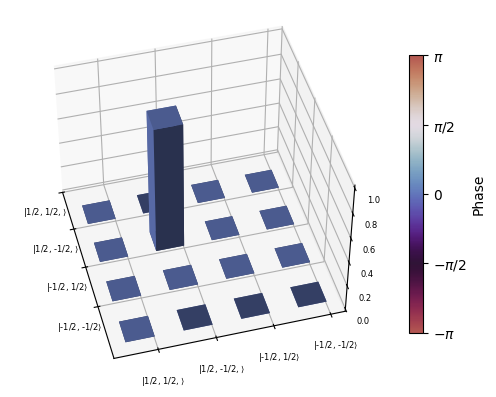

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [104]:
psplt.plot_complex_density_matrix(rotated)

In [105]:
(op.Iy).unit()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j   0.+0.j   0.-0.25j 0.+0.j  ]
 [0.+0.j   0.+0.j   0.+0.j   0.-0.25j]
 [0.+0.25j 0.+0.j   0.+0.j   0.+0.j  ]
 [0.+0.j   0.+0.25j 0.+0.j   0.+0.j  ]]

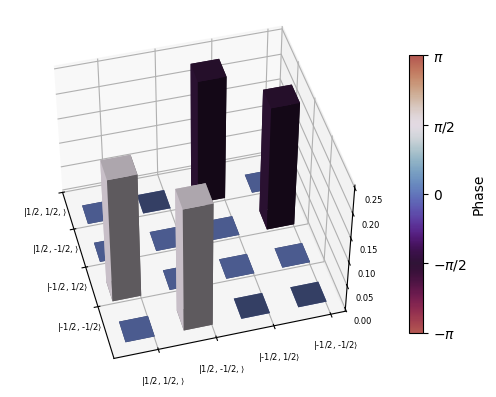

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [106]:
psplt.plot_complex_density_matrix(op.Iy.unit())

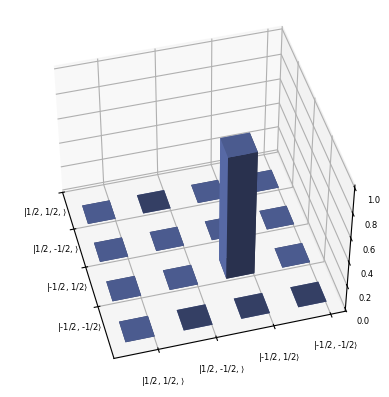

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [107]:
rho_theory = op.CLEAN_0010
psplt.plot_complex_density_matrix(rho_theory, show_legend=False)